In [42]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch
import torch.nn
import torch.optim as optim
torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)

In [43]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [44]:
from torchvision import datasets, transforms
data_path = '../data_unversioned/p1ch7'
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616)),
        transforms.RandomCrop((32,32))
    ]))
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616)),
        transforms.RandomCrop((32,32))
    ]))

In [45]:
img,label = cifar10[0]
img.shape,type(cifar10_val)

(torch.Size([3, 32, 32]), torchvision.datasets.cifar.CIFAR10)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 32, 32]) ship


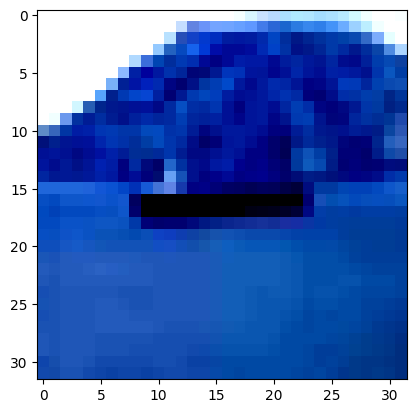

In [46]:
img,label = cifar10[2333]
plt.imshow(img.permute(1,2,0))
print(img.shape,class_names[label])
plt.show()

In [47]:
label_map = {0:0,2:1}
class_names =['airplane','bird']
cifar2 =[(img,label_map[label]) for img,label in cifar10 if (label==0 or label==2)]
cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [0, 2]]

In [48]:
import torch.nn as nn

n_out = 2

model = nn.Sequential(
    nn.Linear(1200,512),
    nn.Tanh(),
    nn.Linear(512,n_out)
)

In [49]:
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2,batch_size=64,
                                           shuffle= True)
val_loader = torch.utils.data.DataLoader(cifar2_val,batch_size=2000,
                                           shuffle= True)

model = nn.Sequential(
    nn.Linear(3072,512),
    nn.Tanh(),
    nn.Linear(512,2),
    nn.LogSoftmax(dim=1)
)

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(),lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs,labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0],-1))
        loss_train = loss_fn(outputs,labels)
        # print(outputs.shape,labels.shape)

        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

    for imgs_val ,labels_val in val_loader:
        outputs = model(imgs_val.view(imgs_val.shape[0],-1))
        loss_val = loss_fn(outputs,labels_val)

    print(f"Epoch = {epoch}  Loss_train: {loss_train:.4f}  loss_val: {loss_val.item():.4f} ")

Epoch = 0  Loss_train: 0.5334  loss_val: 0.4699 
Epoch = 1  Loss_train: 0.3713  loss_val: 0.4685 
Epoch = 2  Loss_train: 0.4177  loss_val: 0.4421 
Epoch = 3  Loss_train: 0.4356  loss_val: 0.4525 
Epoch = 4  Loss_train: 0.5235  loss_val: 0.4570 
Epoch = 5  Loss_train: 0.4515  loss_val: 0.4317 
Epoch = 6  Loss_train: 0.6934  loss_val: 0.4292 
Epoch = 7  Loss_train: 0.4979  loss_val: 0.4456 
Epoch = 8  Loss_train: 0.3510  loss_val: 0.6231 
Epoch = 9  Loss_train: 0.3195  loss_val: 0.4486 
Epoch = 10  Loss_train: 0.4842  loss_val: 0.4244 
Epoch = 11  Loss_train: 0.2262  loss_val: 0.4391 
Epoch = 12  Loss_train: 0.3234  loss_val: 0.4307 
Epoch = 13  Loss_train: 0.2546  loss_val: 0.4186 
Epoch = 14  Loss_train: 0.4166  loss_val: 0.4753 
Epoch = 15  Loss_train: 0.5034  loss_val: 0.4627 
Epoch = 16  Loss_train: 0.2595  loss_val: 0.4339 
Epoch = 17  Loss_train: 0.3899  loss_val: 0.6034 
Epoch = 18  Loss_train: 0.3703  loss_val: 0.5579 
Epoch = 19  Loss_train: 0.3616  loss_val: 0.5709 
Epoch = 20

In [55]:
out = torch.tensor([
    [0.6,0.4],
    [0.9,0.1],
    [0.3,0.7],
    [0.2,0.8],
])

y = torch.tensor([0,0,1,1])
y.shape,y.unsqueeze(-1)

(torch.Size([4]),
 tensor([[0],
         [0],
         [1],
         [1]]))

In [56]:
def mse(out,y):
    #unsqueeze
    y = y.unsqueeze(-1)
    #one_hot
    truth = torch.zeros((out.shape[0],2))
    truth.scatter_(dim=1,index=y,value = 1.0)
    return ((out -truth) **2).sum(dim =1).mean()

mse(out,y)

tensor(0.1500)

In [58]:
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2,batch_size=64,
                                           shuffle= True)
val_loader = torch.utils.data.DataLoader(cifar2_val,batch_size=2000,
                                           shuffle= True)

model = nn.Sequential(
    nn.Linear(3072,512),
    nn.Tanh(),
    nn.Linear(512,2),
    nn.Softmax(dim=1)
)

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(),lr=learning_rate)

loss_fn = mse

n_epochs = 100

for epoch in range(n_epochs):
    for imgs,labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0],-1))
        loss_train = loss_fn(outputs,labels)
        # print(outputs.shape,labels.shape)

        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

    for imgs_val ,labels_val in val_loader:
        outputs = model(imgs_val.view(imgs_val.shape[0],-1))
        loss_val = loss_fn(outputs,labels_val)

    print(f"Epoch = {epoch}  Loss_train: {loss_train:.4f}  loss_val: {loss_val.item():.4f} ")

Epoch = 0  Loss_train: 0.3264  loss_val: 0.3545 
Epoch = 1  Loss_train: 0.3482  loss_val: 0.3018 
Epoch = 2  Loss_train: 0.4361  loss_val: 0.2966 
Epoch = 3  Loss_train: 0.3426  loss_val: 0.2899 
Epoch = 4  Loss_train: 0.2423  loss_val: 0.3869 
Epoch = 5  Loss_train: 0.1946  loss_val: 0.2740 
Epoch = 6  Loss_train: 0.4034  loss_val: 0.2738 
Epoch = 7  Loss_train: 0.3232  loss_val: 0.2703 
Epoch = 8  Loss_train: 0.1573  loss_val: 0.2706 
Epoch = 9  Loss_train: 0.1966  loss_val: 0.2786 
Epoch = 10  Loss_train: 0.1608  loss_val: 0.2685 
Epoch = 11  Loss_train: 0.2610  loss_val: 0.2734 
Epoch = 12  Loss_train: 0.2755  loss_val: 0.2723 
Epoch = 13  Loss_train: 0.4059  loss_val: 0.2858 
Epoch = 14  Loss_train: 0.4030  loss_val: 0.2991 
Epoch = 15  Loss_train: 0.0822  loss_val: 0.2588 
Epoch = 16  Loss_train: 0.0312  loss_val: 0.2609 
Epoch = 17  Loss_train: 0.2736  loss_val: 0.2590 
Epoch = 18  Loss_train: 0.1712  loss_val: 0.2662 
Epoch = 19  Loss_train: 0.3023  loss_val: 0.2649 
Epoch = 20